In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import cv2, os
data = []
target = []
path1 =  "/content/drive/MyDrive/dataset/with mask"
path2 = "/content/drive/MyDrive/dataset/without mask"
img_names1 = os.listdir(path1)
img_names2 = os.listdir(path2)
for img_name in img_names1:
  path = os.path.join(path1,img_name)
  img = cv2.imread(path)
  try:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100,100))
    data.append(resized_img)
    target.append(1)
  except Exception as e:
    pass
for img_name in img_names2:
  path = os.path.join(path1,img_name)
  img = cv2.imread(path)
  try:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100,100))
    data.append(resized_img)
    target.append(0)
  except Exception as e:
    pass

In [15]:
import numpy as np
import pandas as pd
data = np.array(data)
target = np.array(target)
data.shape

(930, 100, 100)

In [16]:
data[0]

array([[255, 255, 255, ..., 224, 224, 224],
       [255, 255, 255, ..., 218, 223, 223],
       [255, 255, 255, ..., 232, 232, 234],
       ...,
       [ 73,  63,  69, ...,  22,  34,  54],
       [ 74,  72,  80, ...,  30,  68,  76],
       [ 85,  79,  78, ...,  36,  55,  91]], dtype=uint8)

Preprocessing of data

In [18]:
data = data/255
data[:5]

array([[[1.        , 1.        , 1.        , ..., 0.87843137,
         0.87843137, 0.87843137],
        [1.        , 1.        , 1.        , ..., 0.85490196,
         0.8745098 , 0.8745098 ],
        [1.        , 1.        , 1.        , ..., 0.90980392,
         0.90980392, 0.91764706],
        ...,
        [0.28627451, 0.24705882, 0.27058824, ..., 0.08627451,
         0.13333333, 0.21176471],
        [0.29019608, 0.28235294, 0.31372549, ..., 0.11764706,
         0.26666667, 0.29803922],
        [0.33333333, 0.30980392, 0.30588235, ..., 0.14117647,
         0.21568627, 0.35686275]],

       [[1.        , 0.99215686, 0.99607843, ..., 0.99215686,
         0.99607843, 1.        ],
        [0.99607843, 1.        , 1.        , ..., 0.99607843,
         0.99607843, 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [0.29803922, 0.2627451 , 0.25098039, ..., 0.1372549 ,
         0.29019608, 0.36078431],
        [0.2

In [19]:
data = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))

In [20]:
data.shape

(930, 10000)

In [24]:
data[:5]

array([[1.        , 1.        , 1.        , ..., 0.14117647, 0.21568627,
        0.35686275],
       [1.        , 0.99215686, 0.99607843, ..., 0.26666667, 0.2       ,
        0.29411765],
       [0.8745098 , 0.94509804, 0.94117647, ..., 0.06666667, 0.13333333,
        0.15294118],
       [0.80392157, 0.80392157, 0.80784314, ..., 0.81176471, 0.83137255,
        0.84313725],
       [0.85882353, 0.76862745, 0.54117647, ..., 0.92941176, 0.93333333,
        0.93333333]])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
new_data = SelectKBest(chi2, k=10000).fit_transform(data, target)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,target,test_size=0.5,random_state=0)

In [ ]:
# PCA reduction to 10 components
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

Model training and testing

In [ ]:
# Using MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model1 = MLPClassifier(alpha=0.001)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
mlp_acc = accuracy_score(y_test, y_pred1)
mlp_acc

0.7096774193548387

In [ ]:
#Using SVM
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model2 = make_pipeline(StandardScaler(), SVC(probability=True))
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
svm_acc=accuracy_score(y_test, y_pred2)
svm_acc

0.7419354838709677

In [ ]:
#Naive bayes model
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
gauss_acc = accuracy_score(y_test, y_pred3)
gauss_acc

0.589247311827957

In [ ]:
#Using perceptron model
from sklearn.linear_model import Perceptron
perc = Perceptron(max_iter=1000)
perc.fit(x_train,y_train)
y_pred_perc = perc.predict(x_test)
perc_acc = accuracy_score(y_test,y_pred_perc)
perc_acc

0.7225806451612903

In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
rf_acc

0.621505376344086

In [ ]:
#Naive bayes model
from sklearn.naive_bayes import MultinomialNB
mult = MultinomialNB()
mult.fit(x_train,y_train)
y_pred_mult = mult.predict(x_test)
mult_acc = accuracy_score(y_test,y_pred_mult)
mult_acc

0.6344086021505376

Model training with PCA data reduction

In [ ]:
model4 = MLPClassifier(alpha=0.001)
model4.fit(pca_x_train, y_train)
y_pred4 = model4.predict(pca_x_test)
m4_acc = accuracy_score(y_test, y_pred4)
m4_acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6903225806451613

In [ ]:
model5 = make_pipeline(StandardScaler(), SVC(probability=True))
model5.fit(pca_x_train, y_train)
y_pred5 = model5.predict(pca_x_test)
m5_acc=accuracy_score(y_test, y_pred5)
m5_acc

0.7505376344086021

In [ ]:
model6 = GaussianNB()
model6.fit(pca_x_train, y_train)
y_pred6 = model6.predict(pca_x_test)
m6_acc = accuracy_score(y_test, y_pred6)
m6_acc

0.7526881720430108

Calculation of recall, precision, f1 score and accuracy of models

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

In [ ]:
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)

In [ ]:
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3)

In [ ]:
acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f1_score4 = f1_score(y_test, y_pred4)

In [ ]:
acc5 = accuracy_score(y_test, y_pred5)
prec5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
f1_score5 = f1_score(y_test, y_pred5)

In [ ]:
acc6 = accuracy_score(y_test, y_pred6)
prec6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
f1_score6 = f1_score(y_test, y_pred6)

In [ ]:
comp = [[acc1,prec1,rec1,f1_score1],[acc2,prec2,rec2,f1_score2],[acc3,prec3,rec3,f1_score3],[acc4,prec4,rec4,f1_score4],[acc5,prec5,rec5,f1_score5],[acc6,prec6,rec6,f1_score6]]
comp_df = pd.DataFrame(comp, columns=("Accuracy", "Precision", "Recall", "F1_score"), index=("MLP_Classifier","SVM","Naive_bayes","MLP_with_PCA","SVM_with_PCA","Naive_bayes_with_PCA"))
comp_df

,Accuracy,Precision,Recall,F1_score
MLP_Classifier,0.709677,0.748837,0.922636,0.826701
SVM,0.741935,0.748373,0.988539,0.851852
Naive_bayes,0.589247,0.788321,0.618911,0.693419
MLP_with_PCA,0.690323,0.744630,0.893983,0.812500
SVM_with_PCA,0.750538,0.750538,1.000000,0.857494
Naive_bayes_with_PCA,0.752688,0.758850,0.982808,0.856429


Comparison of models

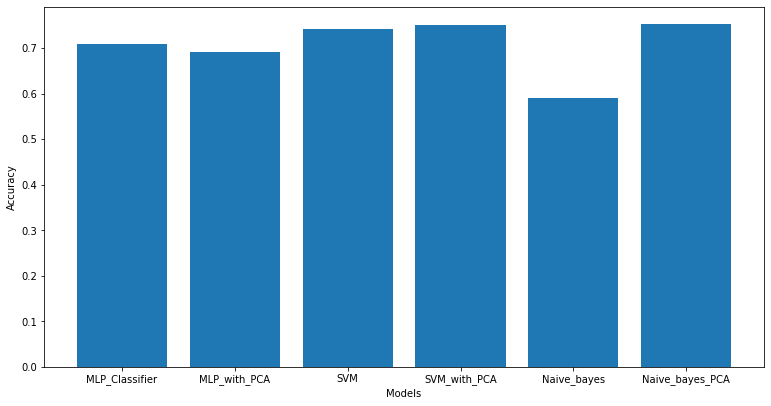

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
accuracies = [mlp_acc,m4_acc,svm_acc,m5_acc,gauss_acc,m6_acc]
models = ["MLP_Classifier","MLP_with_PCA","SVM","SVM_with_PCA","Naive_bayes","Naive_bayes_PCA"]
ax.bar(models,accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

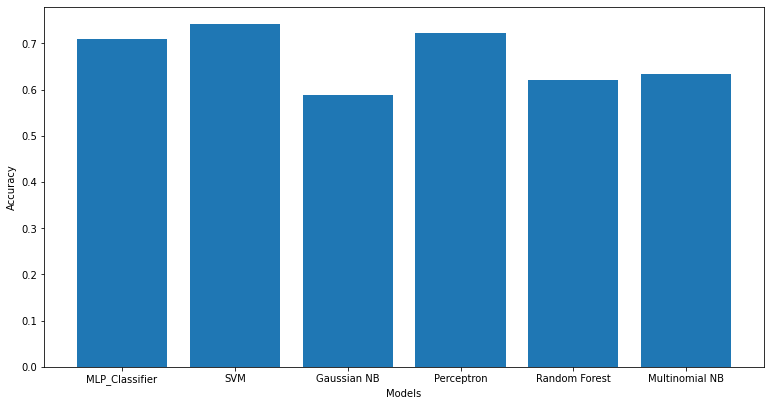

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
accuracies = [mlp_acc,svm_acc,gauss_acc,perc_acc,rf_acc,mult_acc]
models = ["MLP_Classifier","SVM","Gaussian NB","Perceptron","Random Forest","Multinomial NB"]
ax.bar(models,accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Perceptron model with PCA dimension reduction
perc.fit(pca_x_train, y_train)
y_pred7 = perc.predict(pca_x_test)
m7_acc = accuracy_score(y_test, y_pred6)
m7_acc

0.7526881720430108

In [ ]:
# Random forest with PCA reduction
rf.fit(pca_x_train, y_train)
y_pred6 = rf.predict(pca_x_test)
m8_acc = accuracy_score(y_test, y_pred6)
m8_acc

0.610752688172043

Tuning hyperparameters of some models.

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=1000,eta0=0.01)
perceptron.fit(x_train,y_train)
perceptron.score(x_test,y_test)

0.7225806451612903

In [ ]:
from sklearn.metrics import classification_report
y_pred = perceptron.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.03      0.04       116
           1       0.75      0.95      0.84       349

    accuracy                           0.72       465
   macro avg       0.45      0.49      0.44       465
weighted avg       0.60      0.72      0.64       465



In [ ]:
from sklearn.svm import SVC
svc = SVC(C=0.8,gamma='auto')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.7505376344086021

In [ ]:
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.75      1.00      0.86       349

    accuracy                           0.75       465
   macro avg       0.38      0.50      0.43       465
weighted avg       0.56      0.75      0.64       465



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Group Members: \
Chirag (B19CSE026)
Gautam Kumar (B19EE031)
